## Env Creative

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from tqdm import tqdm
import matplotlib.pyplot as plt
import imageio.v2

## Function to add Gaussian noise to the image

In [2]:
def add_noise(img, noise_level):
    noise = np.random.normal(0, noise_level, img.shape)
    noisy_img = img + noise
    return np.clip(noisy_img, 0, 1)

## Define the DIP model (Assuming a simple CNN architecture)

In [3]:
class DIPModel(nn.Module):
    def __init__(self):
        super(DIPModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(128, 3, kernel_size=3, padding=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.conv5(x)
        return x

## Define Show Image Function

## Load target image

In [4]:
img_path = '/kaggle/input/lenna-test-image/Lenna_(test_image).png'
target_img = imageio.imread(img_path)

if target_img.dtype == np.uint8:
    target_img = target_img / 255.0

/tmp/ipykernel_24/1330099834.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  target_img = imageio.imread(img_path)


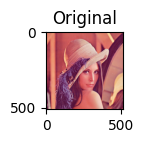

In [5]:
plt.figure(figsize=(3, 1))
plt.title("Original")
plt.imshow(np.clip(target_img, 0, 1))
plt.show()

## Define noise levels and stages

In [6]:
noise_level = 0.1
noisy_img = add_noise(target_img, noise_level)

## Prepare for Training

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [8]:
noisy_img_torch = torch.tensor(noisy_img, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
target_img_torch = torch.tensor(target_img, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)

In [9]:
model = DIPModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

## Training

In [10]:
num_epochs = 3000
patience = 50
best_psnr = 0
best_model = None
psnr_history = []

no_improvement_count = 0  # Initialize the no improvement counter

  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 0, PSNR: 5.3351, SSIM: 0.0396
Epoch [0/3000], Loss: 0.2934, PSNR: 5.3351, SSIM: 0.0396


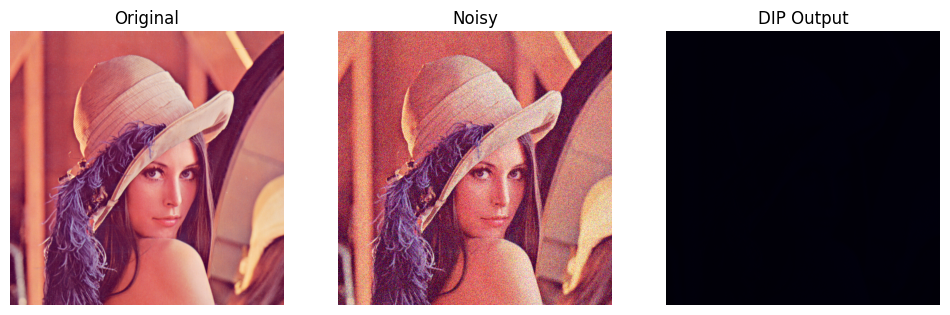

  4%|▍         | 116/3000 [00:18<06:12,  7.74it/s]

Epoch: 100, PSNR: 21.5014, SSIM: 0.7013


  7%|▋         | 216/3000 [00:35<06:06,  7.59it/s]

Epoch: 200, PSNR: 24.0005, SSIM: 0.7360


 11%|█         | 316/3000 [00:52<06:02,  7.41it/s]

Epoch: 300, PSNR: 27.8726, SSIM: 0.7463


 14%|█▍        | 416/3000 [01:10<05:57,  7.23it/s]

Epoch: 400, PSNR: 28.7736, SSIM: 0.7616


 17%|█▋        | 516/3000 [01:28<05:51,  7.07it/s]

Epoch: 500, PSNR: 28.6466, SSIM: 0.7728


 21%|██        | 616/3000 [01:47<05:46,  6.89it/s]

Epoch: 600, PSNR: 29.6395, SSIM: 0.7783


 24%|██▍       | 716/3000 [02:06<05:31,  6.89it/s]

Epoch: 700, PSNR: 30.0592, SSIM: 0.7831


 27%|██▋       | 816/3000 [02:24<05:11,  7.01it/s]

Epoch: 800, PSNR: 30.1982, SSIM: 0.7883


 31%|███       | 916/3000 [02:42<04:56,  7.04it/s]

Epoch: 900, PSNR: 30.2858, SSIM: 0.7907


 33%|███▎      | 1000/3000 [02:58<06:08,  5.43it/s]

Epoch: 1000, PSNR: 30.4411, SSIM: 0.7922
Epoch [1000/3000], Loss: 0.0009, PSNR: 30.4411, SSIM: 0.7922


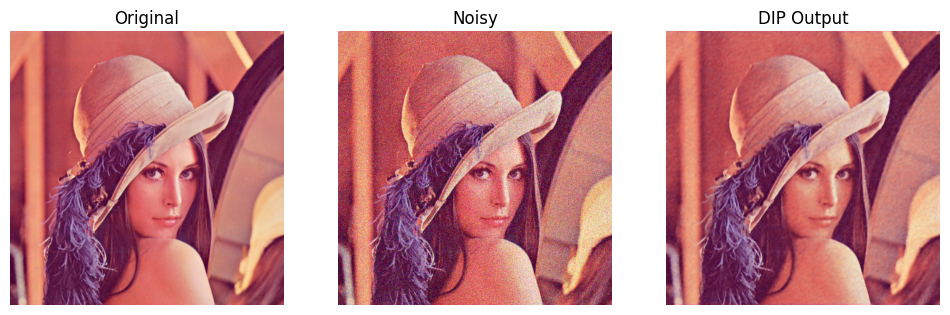

 37%|███▋      | 1116/3000 [03:20<04:31,  6.95it/s]

Epoch: 1100, PSNR: 30.3794, SSIM: 0.7942


 41%|████      | 1216/3000 [03:39<04:16,  6.95it/s]

Epoch: 1200, PSNR: 30.4794, SSIM: 0.7950


 44%|████▍     | 1316/3000 [03:57<04:01,  6.97it/s]

Epoch: 1300, PSNR: 30.4174, SSIM: 0.7959


 47%|████▋     | 1416/3000 [04:16<03:46,  7.00it/s]

Epoch: 1400, PSNR: 30.5721, SSIM: 0.7958


 51%|█████     | 1516/3000 [04:34<03:31,  7.00it/s]

Epoch: 1500, PSNR: 30.5007, SSIM: 0.7962


 54%|█████▍    | 1616/3000 [04:53<03:17,  6.99it/s]

Epoch: 1600, PSNR: 30.4978, SSIM: 0.7965


 57%|█████▋    | 1716/3000 [05:12<03:03,  6.98it/s]

Epoch: 1700, PSNR: 30.6145, SSIM: 0.7983


 61%|██████    | 1816/3000 [05:30<02:49,  6.99it/s]

Epoch: 1800, PSNR: 30.6729, SSIM: 0.7976


 64%|██████▍   | 1916/3000 [05:49<02:35,  6.99it/s]

Epoch: 1900, PSNR: 30.2937, SSIM: 0.7995


 67%|██████▋   | 2000/3000 [06:04<03:04,  5.43it/s]

Epoch: 2000, PSNR: 30.5059, SSIM: 0.7993
Epoch [2000/3000], Loss: 0.0009, PSNR: 30.5059, SSIM: 0.7993


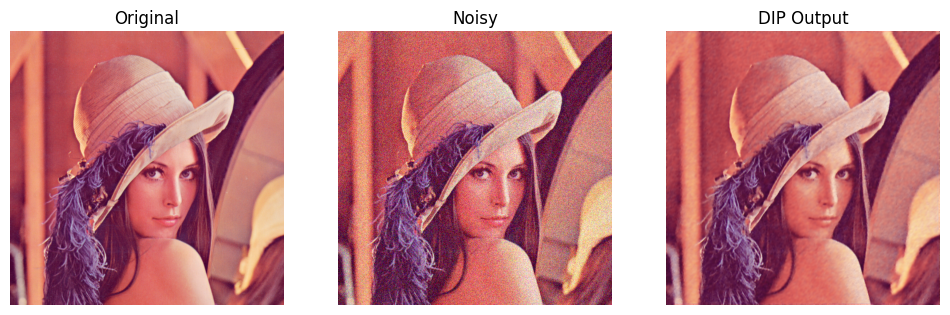

 71%|███████   | 2116/3000 [06:27<02:06,  6.98it/s]

Epoch: 2100, PSNR: 30.7196, SSIM: 0.7992


 74%|███████▍  | 2216/3000 [06:45<01:52,  6.96it/s]

Epoch: 2200, PSNR: 30.7317, SSIM: 0.7997


 77%|███████▋  | 2316/3000 [07:04<01:38,  6.97it/s]

Epoch: 2300, PSNR: 30.7343, SSIM: 0.7999


 81%|████████  | 2416/3000 [07:22<01:23,  6.98it/s]

Epoch: 2400, PSNR: 30.3226, SSIM: 0.8006


 84%|████████▍ | 2516/3000 [07:41<01:09,  6.97it/s]

Epoch: 2500, PSNR: 30.6971, SSIM: 0.8006


 87%|████████▋ | 2616/3000 [07:59<00:54,  6.98it/s]

Epoch: 2600, PSNR: 30.7435, SSIM: 0.8012


 91%|█████████ | 2716/3000 [08:18<00:40,  6.97it/s]

Epoch: 2700, PSNR: 30.6297, SSIM: 0.8017


 94%|█████████▍| 2816/3000 [08:37<00:26,  6.98it/s]

Epoch: 2800, PSNR: 30.5421, SSIM: 0.8024


 97%|█████████▋| 2916/3000 [08:55<00:12,  6.97it/s]

Epoch: 2900, PSNR: 30.7076, SSIM: 0.8020


100%|█████████▉| 2999/3000 [09:11<00:00,  5.43it/s]

Epoch: 2999, PSNR: 30.8002, SSIM: 0.8021
Epoch [2999/3000], Loss: 0.0008, PSNR: 30.8002, SSIM: 0.8021


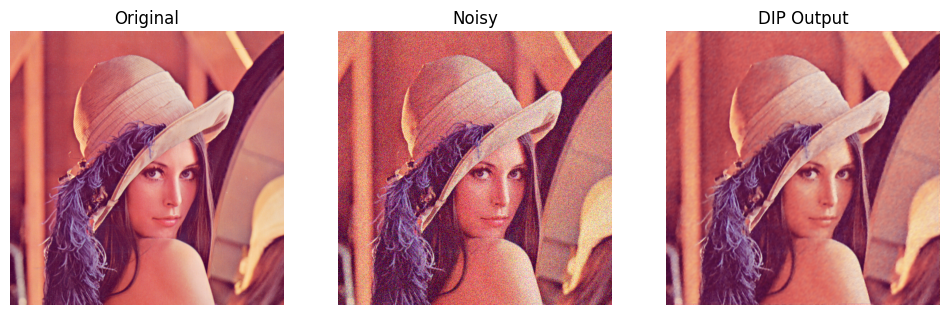

100%|██████████| 3000/3000 [09:14<00:00,  5.41it/s]


In [11]:
for epoch in tqdm(range(num_epochs)):
    model.train()
    optimizer.zero_grad()
    output = model(noisy_img_torch)
    loss = criterion(output, target_img_torch)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0 or epoch == num_epochs - 1:
        model.eval()
        with torch.no_grad():
            output_img = output.squeeze().cpu().numpy().transpose(1, 2, 0)
            output_img = np.clip(output_img, 0, 1)
            current_psnr = psnr(target_img, output_img, data_range=1.0)
            current_ssim = ssim(target_img, output_img, data_range=1.0, channel_axis=-1)
            psnr_history.append(current_psnr)
            print(f"Epoch: {epoch}, PSNR: {current_psnr:.4f}, SSIM: {current_ssim:.4f}")

            # Check for early stopping
            if current_psnr > best_psnr:
                best_psnr = current_psnr
                best_model = model.state_dict()
                no_improvement_count = 0  # Reset counter if improvement
            else:
                no_improvement_count += 1

            if no_improvement_count >= patience:
                print(f"Early stopping at epoch {epoch}")
                break
                        # Plot and save the current output image
            if epoch % 1000 == 0 or epoch == num_epochs - 1:
                print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}, PSNR: {current_psnr:.4f}, SSIM: {current_ssim:.4f}')
                plt.figure(figsize=(12, 6))
                plt.subplot(1, 3, 1)
                plt.title("Original")
                plt.imshow(np.clip(target_img, 0, 1))  
                plt.axis('off')
                plt.subplot(1, 3, 2)
                plt.title("Noisy")
                plt.imshow(np.clip(noisy_img, 0, 1)) 
                plt.axis('off')
                plt.subplot(1, 3, 3)
                plt.title("DIP Output")
                plt.imshow(output_img)
                plt.axis('off')
                plt.show()

In [12]:
model.load_state_dict(best_model)

<All keys matched successfully>

## Evaluation

In [13]:
model.eval()
with torch.no_grad():
    final_output = model(noisy_img_torch).squeeze().cpu().numpy().transpose(1, 2, 0)
    final_output = np.clip(final_output, 0, 1)
    final_psnr = psnr(target_img, final_output, data_range=1.0)
    final_ssim = ssim(target_img, final_output, data_range=1.0, channel_axis=-1)
    print(f"Final PSNR: {final_psnr:.4f}, Final SSIM: {final_ssim:.4f}")

Final PSNR: 30.8128, Final SSIM: 0.8023


## Visulize the result

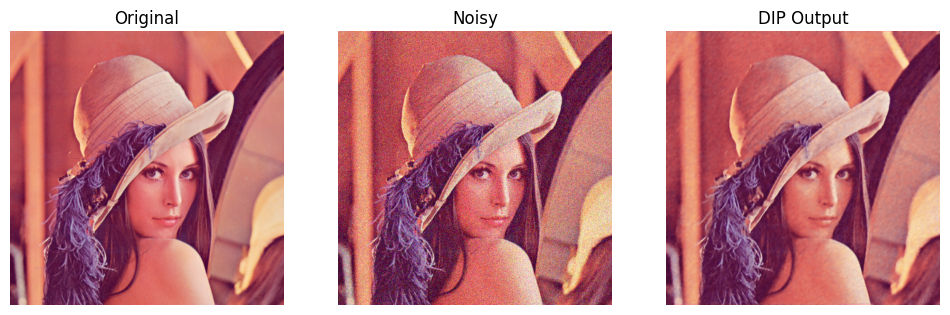

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(np.clip(target_img, 0, 1))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Noisy")
plt.imshow(np.clip(noisy_img, 0, 1))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("DIP Output")
plt.imshow(final_output)
plt.axis('off')
plt.show()